##  Task from insightland academy - Prediction of the vehicle price using the CAR DETAILS dataset from Kaggle.

Task 1: Predict the price of a vehicle using the CAR DETAILS dataset from Kaggle.

Dataset Description:

This vehicle dataset, useful for predicting prices, contains information about cars and motorcycles listed on CarDekho.com. The data is in a CSV file that includes the following columns: model, year, selling price, showroom price, kilometers driven, fuel type, seller type, transmission, and number of previous owners.
Link to the dataset

[Link to the dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data) 

Requirements for the solution:

* It should be original.
* It should include descriptions.
* It should apply several algorithms, assess them, and optimize them.
* It should conclude with final observations.

### Step 1: Import necessary python libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Import file with data

In [16]:
cars = pd.read_csv('cars.csv')

Displaying the dataset

In [17]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Step 3: Displaying the data description using the `skim` function from the `skimpy` library.

In [18]:
# !pip install skimpy
from skimpy import skim

skim(cars)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4340   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50     ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ year            │   0 │     0 │    2013 │   4.215 │   1992 │    2011 │    2014 │   2016 │    2020 │   ▁▃▇▆ │  │
│ │ selling_price   │   0 │     0 │  504100 │  578500 │  20000 │  208700 │  350000 │ 600000 │ 8900000 │   ▇    │  │
│ │ km_driven       │   0 │     0 │   66220 │   46640 │      1 │   35000 │   60000 │  90000 │  806600 │   ▇    │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴─────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                       │      0 │          0 │                          4.7 │                    20194 │  │
│ │ fuel                       │      0 │          0 │                            1 │                     4340 │  │
│ │ seller_type                │      0 │          0 │                            1 │                     4442 │  │
│ │ transmission               │      0 │          0 │                            1 │                     4340 │  │
│ │ owner                      │      0 │          0 │                            2 │                     8859 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

The dataset contains 8 columns, with no missing values. The data types in the columns are:
* `name` - vehicle name == __categorical__
* `year` - year of manufacture == __discrete__
* `selling_price` - selling price == __continuous__
* `km_driven` - mileage == __continuous__
* `fuel` - fuel type == __categorical__
* `seller_type` - seller type == __categorical__
* `transmission` - transmission == __categorical__ (or __binary__)
* `owner` - owner == __categorical__

### Checking unique values for columns with non-continuous values.

In [19]:
# unique values function
def unique_values(df):
    unique_values = {}

    for column in df.columns:
        val = df[column].unique()
        unique_values[column]=val
    
    return unique_values

In [20]:
unique_values(cars.drop(columns=['selling_price','km_driven']))

{'name': array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
        'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
        'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
        'Hyundai i20 Magna 1.4 CRDi'], dtype=object),
 'year': array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
        2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
        1999, 2001, 1995, 1997, 1992], dtype=int64),
 'fuel': array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 'seller_type': array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 'transmission': array(['Manual', 'Automatic'], dtype=object),
 'owner': array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
        'Third Owner', 'Test Drive Car'], dtype=object)}

### Checking if the dataset has duplicate values.

In [21]:
def check_for_duplicates(df):
    # Returns info about duplicated values
    duplicated = df.duplicated()
    if True in duplicated:
        print('The dataframe does have duplicate values!')
    else: print("The dataframe doesn't have duplicate values!")
    return duplicated

check_for_duplicates(cars)

The dataframe doesn't have duplicate values!


0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [22]:
### !pip install skimpy
from skimpy import skim # fajny moduł do generowania opisu danych, wg mnie lepszy od funkcji describe() z pandas
skim(cars)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4340   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50     ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ year            │   0 │     0 │    2013 │   4.215 │   1992 │    2011 │    2014 │   2016 │    2020 │   ▁▃▇▆ │  │
│ │ selling_price   │   0 │     0 │  504100 │  578500 │  20000 │  208700 │  350000 │ 600000 │ 8900000 │   ▇    │  │
│ │ km_driven       │   0 │     0 │   66220 │   46640 │      1 │   35000 │   60000 │  90000 │  806600 │   ▇    │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴─────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                       │      0 │          0 │                          4.7 │                    20194 │  │
│ │ fuel                       │      0 │          0 │                            1 │                     4340 │  │
│ │ seller_type                │      0 │          0 │                            1 │                     4442 │  │
│ │ transmission               │      0 │          0 │                            1 │                     4340 │  │
│ │ owner                      │      0 │          0 │                            2 │                     8859 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<h5> Considering the mean and standard deviation, the columns <b>selling_price</b> and <b>km_driven</b> have outliers </h5>
<h5> On the other hand, both columns have a wide range of values, so using the mean may not be the best approach (selling_price ranges from 20k to 8 million).</h5>
I have decided to use the IQR method for outlier detection.

In [23]:
def IQR_method(df_column, threshold = 2):
    Q1, Q3 = np.percentile(df_column, [25,75])
    IQR = Q3-Q1
    outliers = []
    for item in df_column:
        if item < (Q1 - threshold*IQR) or item > (Q3 + threshold*IQR):
            outliers.append(item)
    return outliers

In [24]:
len(IQR_method(cars['selling_price']))

191

In [25]:
len(IQR_method(cars['km_driven'])) 

57

Outliers weren't replaced or deleted, beacause I wanted to check response of the ML models

Histograms of numerical values

c:\Users\kamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


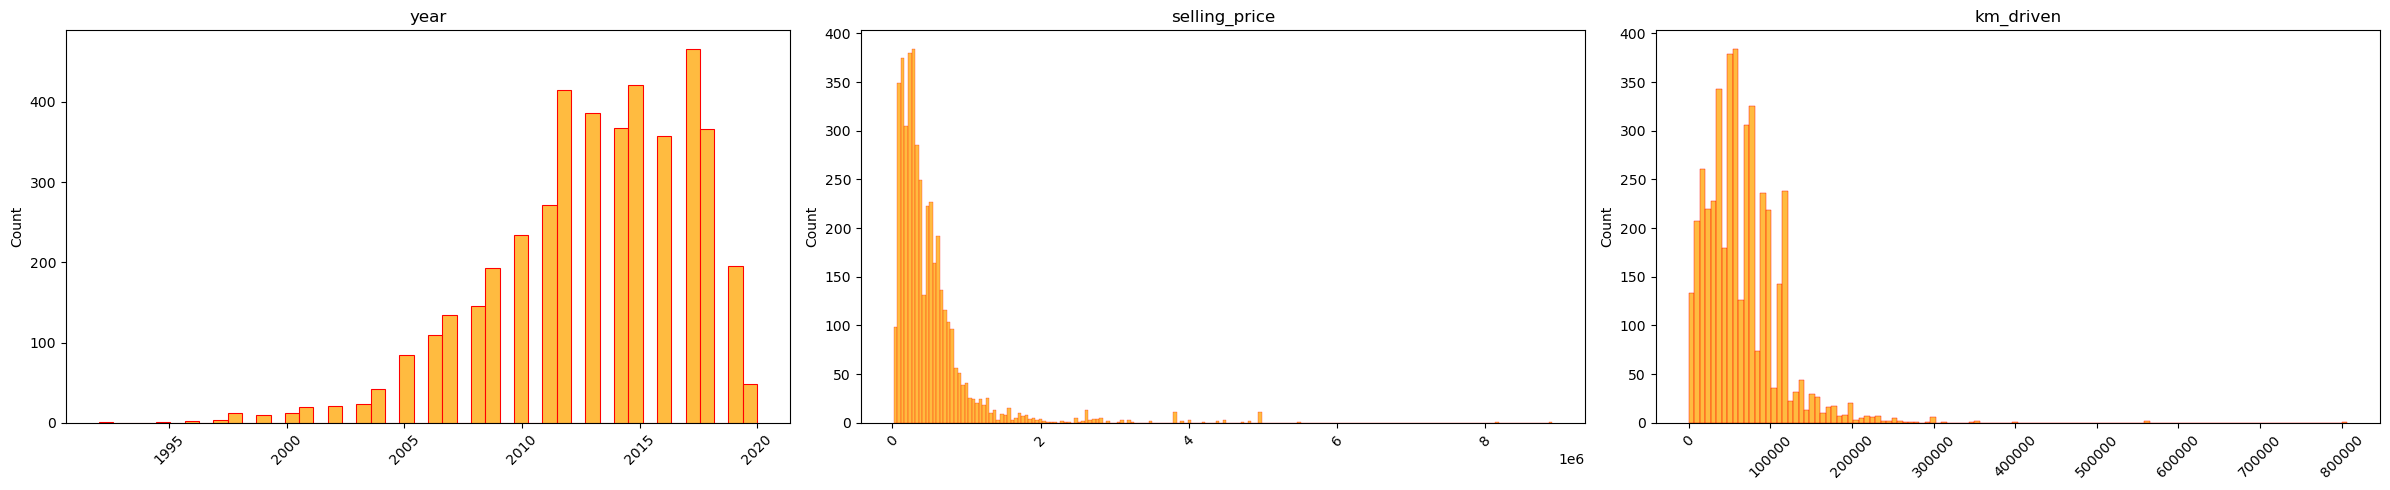

In [26]:
import seaborn as sns

cars_copy = cars[['year','selling_price','km_driven']]
def figure_histplots(df):    
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_size_inches(24,5)
    for column, index in zip(df.columns, [0,1,2]):
        sns.histplot(data=sorted(df[column]), ax=axes[index], color='orange', edgecolor='red')
        axes[index].set_title(column)
        axes[index].tick_params(axis='x', labelrotation=45)
    plt.tight_layout()
    fig.savefig('histograms_1.jpg', dpi='figure', format='jpg')
    del df
    pass

figure_histplots(cars_copy)

Boxplots

In [27]:
cars_copy = cars.drop(columns = ['name','year','selling_price','km_driven'])
for column in cars_copy.columns:
    print(cars_copy[column].value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


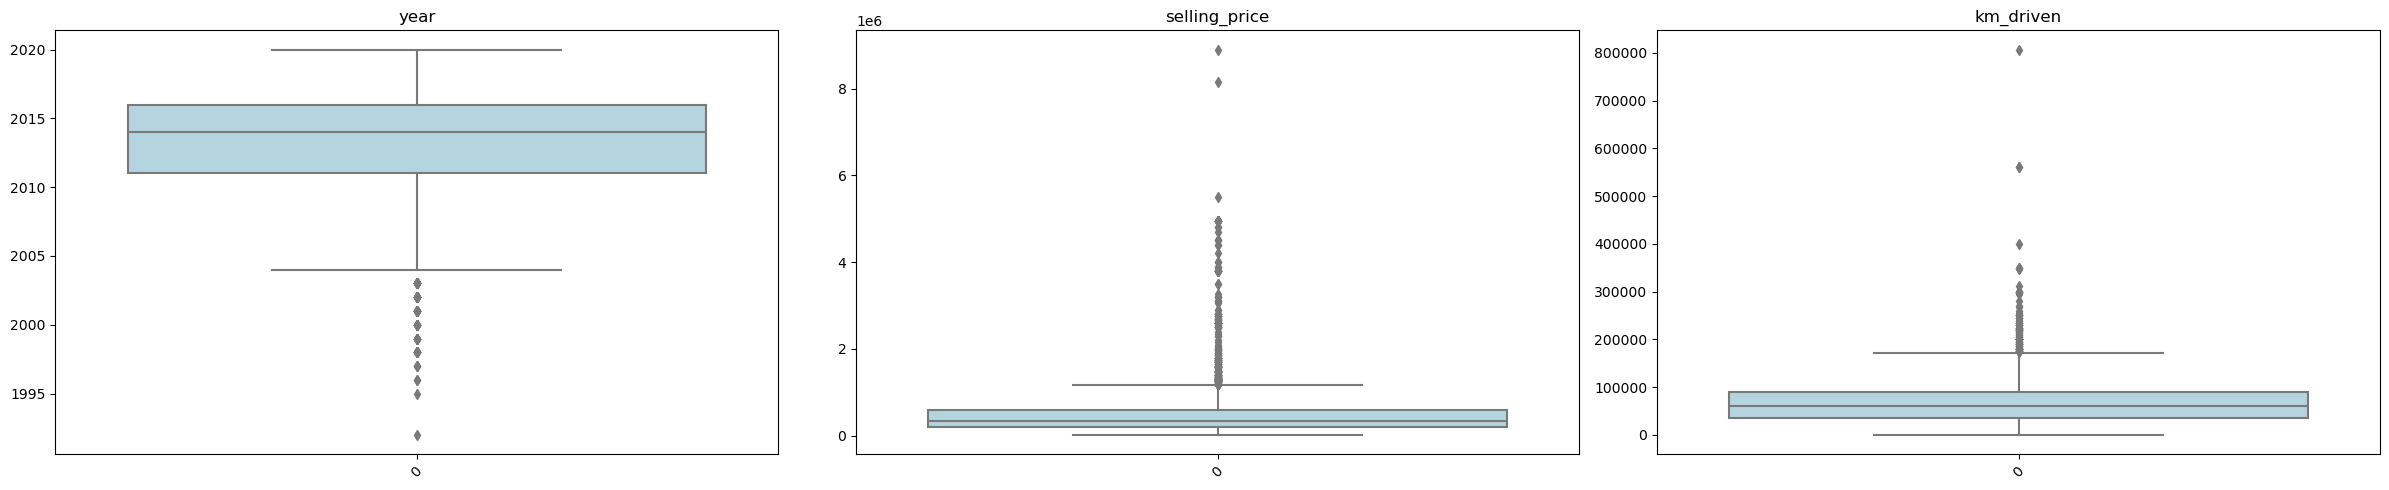

In [28]:
cars_copy = cars[['year','selling_price','km_driven']]
def figure_boxplots(df):    
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_size_inches(24,5)
    for column, index in zip(df.columns, [0,1,2]):
        sns.boxplot(data=sorted(df[column]), ax=axes[index], color='lightblue')
        axes[index].set_title(column)
        axes[index].tick_params(axis='x', labelrotation=45)
    plt.tight_layout()
    fig.savefig('boxplots.jpg', dpi='figure', format='jpg')
    del df
    pass

figure_boxplots(cars_copy)

In [29]:
cars_copy = cars[['year','selling_price','km_driven']]


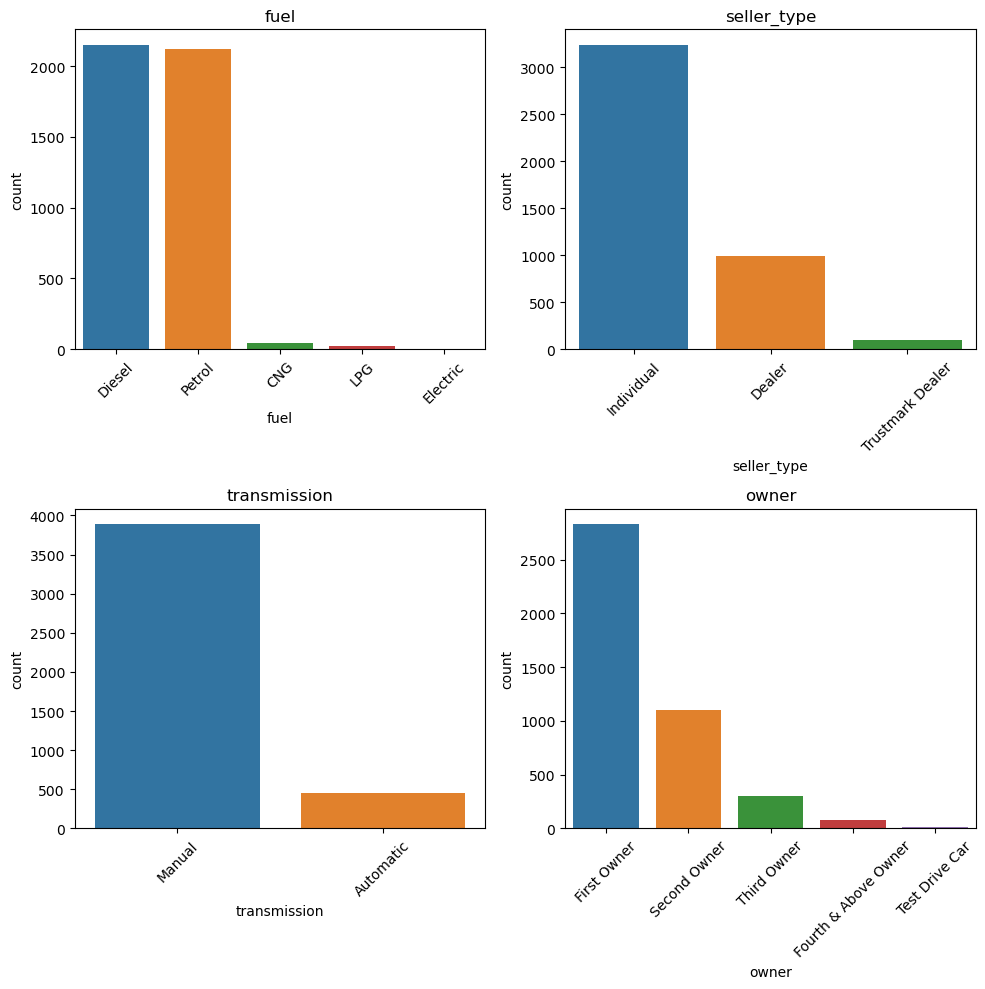

In [30]:
cars_copy = cars.drop(columns = ['name','year','selling_price','km_driven'])
def figure_count_plots(df):    
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(10,10)
    for column, (i, j) in zip(df.columns,[(a, b) for a in range(2) for b in range(2)]):
        sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax=axes[i, j])
        axes[i, j].set_title(column)
        axes[i, j].tick_params(axis='x', labelrotation=45)
    plt.tight_layout()
    fig.savefig('count_plots.jpg', dpi='figure', format='jpg')
    del df
    pass

figure_count_plots(cars_copy)

### Reducing the number of categories in columns fuel, seller_type, owner

In [31]:
cars_copy_data = cars.copy()

In [32]:
(cars['fuel'] == 'Electric').sum() ## 1
(cars['fuel'] == 'CNG').sum() ## 40
(cars['fuel'] == 'LPG').sum() ## 23

# This categories will be summed up into 'other' category

cars_copy_data['fuel'] = cars_copy_data['fuel'].apply(lambda x: 'Other' if x != 'Diesel' and x != 'Petrol' else x)


In [33]:
(cars['seller_type'] == 'Dealer').sum() ## 994
(cars['seller_type'] == 'Trustmark Dealer').sum() ## 102 - low value compared to Dealer, so I will include it in the 'Dealer' category

cars_copy_data['seller_type'] = cars_copy_data['seller_type'].apply(lambda x: 'Dealer' if x == 'Trustmark Dealer' else x)

In [34]:
print((cars['owner'] == 'Third Owner').sum()) ## 304
print((cars['owner'] == 'Fourth & Above Owner').sum()) ## 81
print((cars['owner'] == 'Test Drive Car').sum()) ## 17 

cars_copy_data['owner'] = cars_copy_data['owner'].apply(lambda x: 'Third Plus Owner' if x != 'First Owner' and x != 'Second Owner' else x)

304
81
17


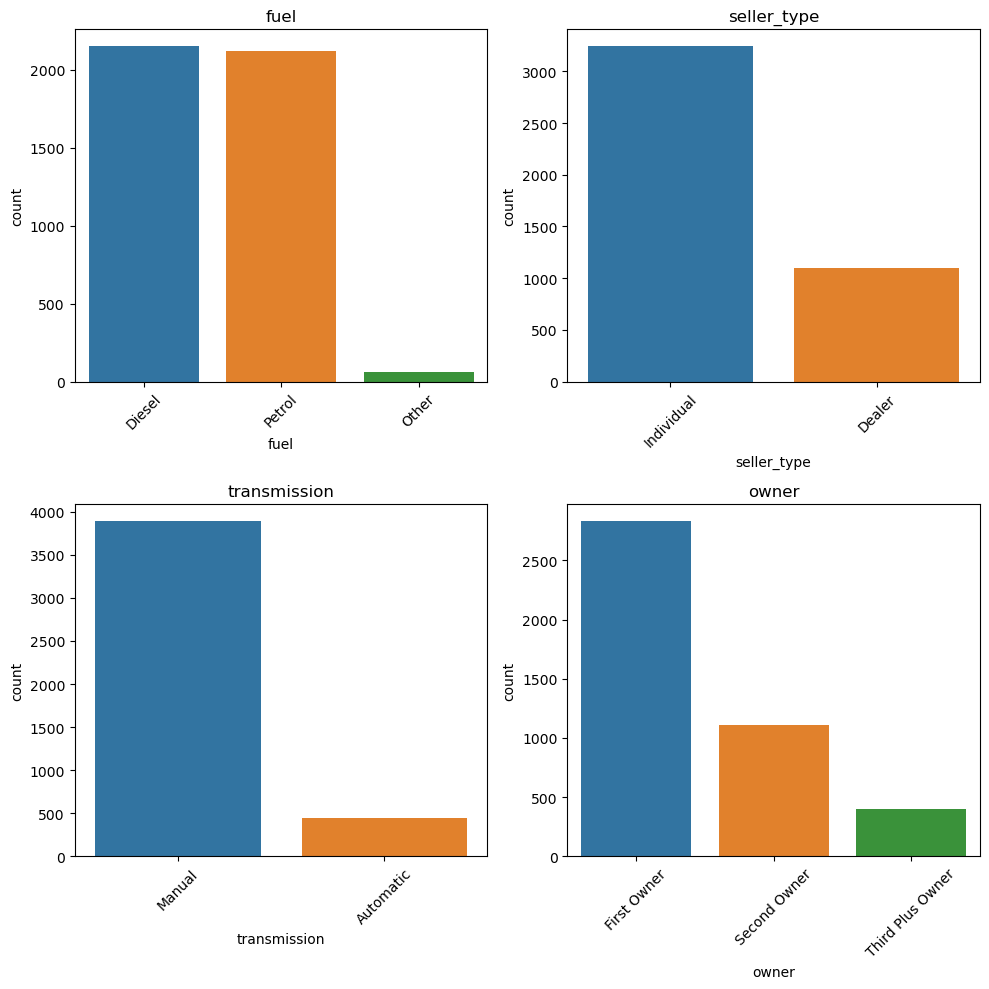

In [35]:
figure_count_plots(cars_copy_data.drop(columns = ['name','year','selling_price','km_driven']))

In [36]:
cars_copy_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [37]:
strin = 'Ford Focus'
strin.split(' ')[0]

'Ford'

### Extracting the car brand from the dataset - I think the car brand also influences the price, however, more data related to customer choices on the given site would be needed

In [38]:
cars_copy_data['name'] = cars_copy_data['name'].apply(lambda x: x.split(' ')[0])
cars_copy_data['name']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name, Length: 4340, dtype: object

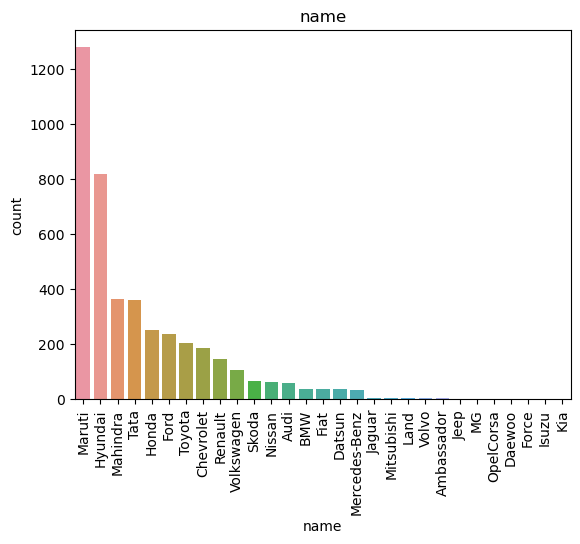

In [39]:
plot = sns.countplot(x='name', data=cars_copy_data, order=cars_copy_data['name'].value_counts().index)
plot.set_title('name')
plot.tick_params(axis='x', labelrotation=90)

In [40]:
to_other = ['Jaguar','Mitsubishi','Land','Volvo','Ambassador','Jeep','MG','OpelCorsa','Daewoo','Force','Isuzu','Kia']
cars_copy_data['name'] = cars_copy_data['name'].apply(lambda x: 'Other' if x in to_other else x)

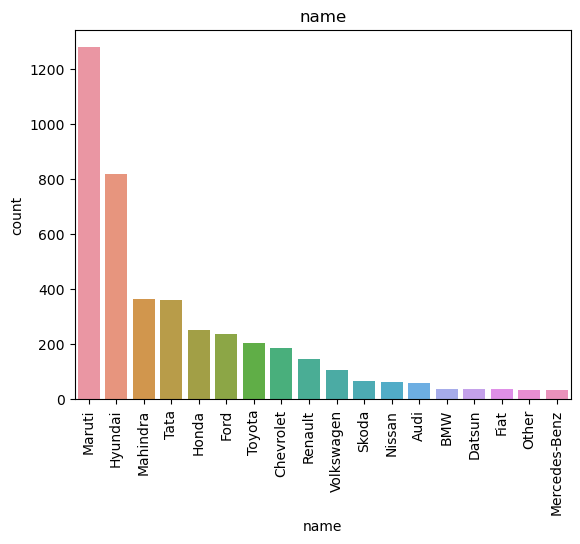

In [41]:
plot = sns.countplot(x='name', data=cars_copy_data, order=cars_copy_data['name'].value_counts().index)
plot.set_title('name')
plot.tick_params(axis='x', labelrotation=90)

### Przegląd wartości maksymalnych i minimalnych - marki takie jak Mercedes, Audi i BMW są w wyższych tierach cenowych

In [42]:
print(cars_copy_data.groupby('name')['selling_price'].max())

name
Audi             8900000
BMW              4950000
Chevrolet        1000000
Datsun            450000
Fiat              890000
Ford             3200000
Honda            1800000
Hyundai          1650000
Mahindra         2700000
Maruti           1100000
Mercedes-Benz    8150000
Nissan           1350000
Other            4500000
Renault          1000000
Skoda            1200000
Tata             1700000
Toyota           3200000
Volkswagen       1350000
Name: selling_price, dtype: int64


In [43]:
print(cars_copy_data.groupby('name')['selling_price'].min())

name
Audi             650000
BMW              480000
Chevrolet         50000
Datsun           200000
Fiat              55000
Ford              20000
Honda             65000
Hyundai           48000
Mahindra          80000
Maruti            30000
Mercedes-Benz    350000
Nissan           138000
Other             35000
Renault          200000
Skoda             90000
Tata              35000
Toyota            95000
Volkswagen       130000
Name: selling_price, dtype: int64


In [44]:
X = cars_copy_data.drop(columns=['selling_price'])
y = cars_copy_data['selling_price']

#### Label encoding for owner column

In [45]:
encode_owner = {
    'Third Plus Owner': 0,
    'Second Owner': 1, 
    'First Owner': 2, 
}

X['owner'] = cars_copy_data['owner'].apply(lambda x: encode_owner[x])

In [46]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,70000,Petrol,Individual,Manual,2
1,Maruti,2007,50000,Petrol,Individual,Manual,2
2,Hyundai,2012,100000,Diesel,Individual,Manual,2
3,Datsun,2017,46000,Petrol,Individual,Manual,2
4,Honda,2014,141000,Diesel,Individual,Manual,1
...,...,...,...,...,...,...,...
4335,Hyundai,2014,80000,Diesel,Individual,Manual,1
4336,Hyundai,2014,80000,Diesel,Individual,Manual,1
4337,Maruti,2009,83000,Petrol,Individual,Manual,1
4338,Hyundai,2016,90000,Diesel,Individual,Manual,2


#### One hot encoding for the rest categorical columns

In [47]:
X_encoded = pd.get_dummies(X, columns=['name','fuel','seller_type','transmission'])

In [48]:
X_encoded

,year,km_driven,owner,name_Audi,name_BMW,name_Chevrolet,name_Datsun,name_Fiat,name_Ford,name_Honda,...,name_Tata,name_Toyota,name_Volkswagen,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,2007,70000,2,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,2007,50000,2,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
2,2012,100000,2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,2017,46000,2,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,2014,141000,1,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4336,2014,80000,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4337,2009,83000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4338,2016,90000,2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


#### Splitting the data into training and testing sets

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (3472, 28)
Shape of y_train =  (3472,)
Shape of X_test =  (868, 28)
Shape of y_test =  (868,)


### Linear Reggression model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Inicjacja obiektu modelu regresji liniowej
model = LinearRegression()
# Dopasowanie danych treningowych
model.fit(X_train, y_train)

# Funkcja zwracająca metrykę dla tego modelu
def regression_metrics(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # MAE, MSE, RMSE i współczynnik R^2 dla zbioru treningowego
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = sqrt(train_mse.mean())
    train_r2 = r2_score(y_train, y_pred_train)

    # MAE, MSE, RMSE i współczynnik R^2 dla zbioru testowego
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = sqrt(test_mse.mean())
    test_r2 = r2_score(y_test, y_pred_test)

    # Wyświetla wszystkie metryki 
    print(f"Training MAE: {train_mae.mean():.2f}")
    print(f"Training MSE: {train_mse.mean():.2f}")
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Training R²: {train_r2.mean():.3f}")
    print('==='*50)
    print(f"Testing MAE: {test_mae.mean():.2f}")
    print(f"Testing MSE: {test_mse.mean():.2f}")
    print(f"Testing RMSE: {test_rmse:.2f}")
    print(f"Testing R²: {test_r2.mean():.3f}")

    # Lista wyliczonych parametrów - potrzebne do porównania
    model_params = [train_mae, train_mse, train_rmse, train_r2, test_mae, test_mse, test_rmse, test_r2]

    return model_params

linear_params = regression_metrics(model, X_train, y_train)

Training MAE: 186037.78
Training MSE: 103725837243.02
Training RMSE: 322064.96
Training R²: 0.697
Testing MAE: 190428.42
Testing MSE: 148846398036.50
Testing RMSE: 385806.17
Testing R²: 0.512


Nie jest to zbyt dobre dopasowanie, natomiast przy pominięciu kolumny 'name' (usunięcie z datasetu, co sprawia, że kolumn zamiast 30 jest 10) powoduje, że R² jest w okolicach 0,43 dla treningowego i 0,40 dla testowego

### XGBOOST model


In [51]:
categorical_cols = list(cars_copy_data.select_dtypes(include='object'))
cars_copy_data[categorical_cols] = cars_copy_data[categorical_cols].astype('category')


X = cars_copy_data.drop(columns=['selling_price'])
# X_encoded = pd.get_dummies(X, columns=['name','fuel','seller_type','transmission','owner'])
y = cars_copy_data['selling_price']

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          4340 non-null   category
 1   year          4340 non-null   int64   
 2   km_driven     4340 non-null   int64   
 3   fuel          4340 non-null   category
 4   seller_type   4340 non-null   category
 5   transmission  4340 non-null   category
 6   owner         4340 non-null   category
dtypes: category(5), int64(2)
memory usage: 90.3 KB


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor, DMatrix, train
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

# Initial parameter setting ==> for optimization
params = {
    'objective': 'reg:squarederror',
    'tree_method':"hist",
    'max_depth': 6,
    'alpha': 10,
    'learning_rate': 0.01,
    'eval_metric': 'rmse',
    'enable_categorical': True,
    'max_cat_to_onehot':21
}

model = XGBRegressor(**params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# obliczenie metryk
mae_train = np.absolute(cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
mae_test = np.absolute(cross_val_score(model, X_test, y_test, cv=3, scoring='neg_mean_absolute_error'))
mse_train = np.absolute(cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_test = np.absolute(cross_val_score(model, X_test, y_test, cv=3, scoring='neg_mean_squared_error'))

print(f"MAE train: {mae_train.mean():.2f} | {mae_train.std():.2f}")
print(f"MAE test: {mae_test.mean():.2f} | {mae_test.std():.2f}")
print(f"MSE train: {mse_train.mean():.2f} | {mse_train.std():.2f}")
print(f"MSE test: {mse_test.mean():.2f} | {mse_test.std():.2f}")
print(f"RMSE train: {sqrt(mse_train.mean()):.2f} | {sqrt(mse_train.std()):.2f}")
print(f"RMSE test: {sqrt(mse_test.mean()):.2f} | {sqrt(mse_test.std()):.2f}")

print('\n'+'==='*50+'\n')

### The contribution of individual features in matching
feature_importance = zip(X.columns.to_list(), list(model.feature_importances_))
for column, importance in feature_importance:
    print(f'{column}  {importance:.4f}')

print('='*20)
print(f'RMSE_test - RMSE_train: {(sqrt(mse_test.mean())-sqrt(mse_train.mean())):2f}')


MAE train: 193886.34 | 1857.56
MAE test: 209126.35 | 13040.50
MSE train: 122027725197.92 | 18833355825.12
MSE test: 197555405471.64 | 94834770217.17
RMSE train: 349324.67 | 137234.67
RMSE test: 444472.05 | 307952.55


name  0.0190
year  0.0264
km_driven  0.0244
fuel  0.1271
seller_type  0.0153
transmission  0.7820
owner  0.0059
RMSE_test - RMSE_train: 95147.382338


#### Optimizing XGBOOST parameters using Randomized Search

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from numpy import absolute

hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100],
    'alpha': [1,5,10],
    'max_cat_to_onehot':[10, 20, 30]
}

# Creating a regressor
regressor = XGBRegressor(enable_categorical=True)

random_cv = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=hyperparameter_grid,
    cv=5,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    n_jobs=4,
    verbose=5,
    return_train_score=True,
    random_state=42
)
  
random_cv.fit(X_train, y_train)
print(random_cv.best_estimator_)
print(f'Minimal value of RMSE: {absolute(random_cv.best_score_)}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=10, max_delta_step=None,
             max_depth=6, max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)
Najmniejsza wartość RMSE: 224035.49244002852


### Optimizing XGBOOST parameters using GridSearch

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from numpy import absolute

hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100],
    'alpha': [1,5,10],
    'max_cat_to_onehot':[10, 20, 30]
}

# Utworzenie regresora
regressor = XGBRegressor(enable_categorical=True)

# Grid Search 
grid_cv = GridSearchCV(
    estimator=regressor,
    param_grid=hyperparameter_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=4,
    verbose=5,
    return_train_score=True,
    
)

# Dopasowanie do danych
grid_cv.fit(X_train, y_train)

# Wyświetlenie najlepszych wartości
print(grid_cv.best_estimator_)
print(f'Najmniejsza wartość RMSE: {absolute(grid_cv.best_score_)}')


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBRegressor(alpha=5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=10, max_delta_step=None,
             max_depth=6, max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)
Najmniejsza wartość RMSE: 224035.48383311642


In [56]:
# Model with best params from GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

params = {
    'objective': 'reg:squarederror',
    'n_estimators':100,
    'tree_method':"hist",
    'max_depth': 6,
    'alpha': 5,
    'learning_rate': 0.2,
    'eval_metric': 'rmse',
    'enable_categorical': True,
    'max_cat_to_onehot':10,
    'min_child_weight':10
}

model = XGBRegressor(**params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


mae_train = np.absolute(cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
mae_test = np.absolute(cross_val_score(model, X_test, y_test, cv=3, scoring='neg_mean_absolute_error'))
mse_train = np.absolute(cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_test = np.absolute(cross_val_score(model, X_test, y_test, cv=3, scoring='neg_mean_squared_error'))

print(f"MAE train: {mae_train.mean():.2f} | {mae_train.std():.2f}")
print(f"MAE test: {mae_test.mean():.2f} | {mae_test.std():.2f}")
print(f"MSE train: {mse_train.mean():.2f} | {mse_train.std():.2f}")
print(f"MSE test: {mse_test.mean():.2f} | {mse_test.std():.2f}")
print(f"RMSE train: {sqrt(mse_train.mean()):.2f} | {sqrt(mse_train.std()):.2f}")
print(f"RMSE test: {sqrt(mse_test.mean()):.2f} | {sqrt(mse_test.std()):.2f}")

print('\n'+'==='*50+'\n')

feature_importance = zip(X.columns.to_list(), list(model.feature_importances_))
for column, importance in feature_importance:
    print(f'{column}  {importance:.4f}')

print('='*20)
print(f'RMSE_test - RMSE_train: {(sqrt(mse_test.mean())-sqrt(mse_train.mean())):2f}')

MAE train: 130046.93 | 2823.45
MAE test: 187727.27 | 9019.84
MSE train: 57679572843.88 | 10504611310.10
MSE test: 181710917615.20 | 62888224943.04
RMSE train: 240165.72 | 102492.01
RMSE test: 426275.64 | 250775.25


name  0.3732
year  0.2506
km_driven  0.0206
fuel  0.1030
seller_type  0.0678
transmission  0.1748
owner  0.0100
RMSE_test - RMSE_train: 186109.916184


In [57]:
# Model with best params from RandomSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

params = {
    'objective': 'reg:squarederror',
    'n_estimators':100,
    'tree_method':"hist",
    'max_depth': 6,
    'alpha': 1,
    'learning_rate': 0.2,
    'eval_metric': 'rmse',
    'enable_categorical': True,
    'max_cat_to_onehot':10,
    'min_child_weight':10
}

model = XGBRegressor(**params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


mae_train = np.absolute(cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
mae_test = np.absolute(cross_val_score(model, X_test, y_test, cv=3, scoring='neg_mean_absolute_error'))
mse_train = np.absolute(cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_test = np.absolute(cross_val_score(model, X_test, y_test, cv=3, scoring='neg_mean_squared_error'))

print(f"MAE train: {mae_train.mean():.2f} | {mae_train.std():.2f}")
print(f"MAE test: {mae_test.mean():.2f} | {mae_test.std():.2f}")
print(f"MSE train: {mse_train.mean():.2f} | {mse_train.std():.2f}")
print(f"MSE test: {mse_test.mean():.2f} | {mse_test.std():.2f}")
print(f"RMSE train: {sqrt(mse_train.mean()):.2f} | {sqrt(mse_train.std()):.2f}")
print(f"RMSE test: {sqrt(mse_test.mean()):.2f} | {sqrt(mse_test.std()):.2f}")

print('\n'+'==='*50+'\n')

feature_importance = zip(X.columns.to_list(), list(model.feature_importances_))
for column, importance in feature_importance:
    print(f'{column}  {importance:.4f}')

print('='*20)
print(f'RMSE_test - RMSE_train: {(sqrt(mse_test.mean())-sqrt(mse_train.mean())):2f}')

MAE train: 130046.94 | 2823.46
MAE test: 187727.33 | 9019.81
MSE train: 57679581070.12 | 10504621675.99
MSE test: 181710980076.60 | 62888236609.14
RMSE train: 240165.74 | 102492.06
RMSE test: 426275.71 | 250775.27


name  0.3732
year  0.2506
km_driven  0.0206
fuel  0.1030
seller_type  0.0678
transmission  0.1748
owner  0.0100
RMSE_test - RMSE_train: 186109.972322


In this case, both algorithms ended up selecting a similar set of parameters and feature contributions. However, there is a significant difference between training and test set values. Most likely, the model is overfitting, so it may be necessary to revisit the data preprocessing phase to eliminate outliers and improve the distribution of continuous values. It's worth noting that parameter optimization resulted in reduced MAE, MSE, and RMSE values on both the training and test sets.

### Przykład do sprawdzenia modelu

In [58]:
car = {
    'name':['Toyota'],
    'year':[2011],
    'km_driven': [96000],
    'fuel':['Petrol'],
    'seller_type':['Individual'],
    'transmission':['Manual'],
    'owner':['Second Owner']}

car = pd.DataFrame(car)
object_cols = list(car.select_dtypes(include='object'))
car[object_cols] = car[object_cols].astype('category')
y_pred = model.predict(car)
print(f'Selling price: {y_pred[0]}')

Selling price: 1493052.125


It's evident that the prediction is significantly inflated, so we should 'dig into the data' and delete outliers or impute them with for example median values.